In [21]:
import pandas as pd
import numpy as np
# Load dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,EX,FT,Data Scientist,300000,USD,300000,US,100,US,L
1,2020,MI,FT,Machine Learning Infrastructure Engineer,44000,EUR,50180,PT,0,PT,M
2,2020,MI,FT,Lead Data Analyst,87000,USD,87000,US,100,US,L
3,2020,MI,FT,Data Engineer,88000,GBP,112872,GB,50,GB,L
4,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4644 non-null   int64 
 1   experience_level    4644 non-null   object
 2   employment_type     4644 non-null   object
 3   job_title           4644 non-null   object
 4   salary              4644 non-null   int64 
 5   salary_currency     4644 non-null   object
 6   salary_in_usd       4644 non-null   int64 
 7   employee_residence  4644 non-null   object
 8   remote_ratio        4644 non-null   int64 
 9   company_location    4644 non-null   object
 10  company_size        4644 non-null   object
dtypes: int64(4), object(7)
memory usage: 399.2+ KB


In [23]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,4644.000000,4.644000e+03,4644.000000,4644.000000
mean,2023.598622,1.811641e+05,148308.590655,30.437123
std,1.291953,5.811530e+05,71866.704839,45.234242
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.000000e+05,99100.000000,0.000000
50%,2024.000000,1.411350e+05,140000.000000,0.000000
75%,2025.000000,1.880000e+05,185000.000000,100.000000
max,2025.000000,3.040000e+07,750000.000000,100.000000


In [24]:
salary_outliers = df[(df['salary_in_usd'] < 40000) | (df['salary_in_usd'] > 200000)]

df['salary_in_usd'].fillna(df['salary_in_usd'].median(), inplace=True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn import linear_model

In [27]:
import sklearn.metrics as metrics

In [28]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,EX,FT,Data Scientist,300000,USD,300000,US,100,US,L
1,2020,MI,FT,Machine Learning Infrastructure Engineer,44000,EUR,50180,PT,0,PT,M
2,2020,MI,FT,Lead Data Analyst,87000,USD,87000,US,100,US,L
3,2020,MI,FT,Data Engineer,88000,GBP,112872,GB,50,GB,L
4,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S


In [29]:
X = df.drop (columns=["salary_in_usd", "experience_level", "employment_type", "job_title", "employee_residence", "remote_ratio", "company_location", "company_size", "salary_currency"])
Y = df["salary_in_usd"]

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2, random_state=42)

In [30]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("RMSE:", np.sqrt(mse))

Mean Squared Error: 5522389588.977271
RMSE: 74312.78213724252


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Load Data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Feature Selection & Justification
# We select features that logically influence salary (Domain Knowledge):
# - experience_level: Higher experience usually correlates with higher pay.
# - job_title: Specialized roles (e.g., AI Engineer) often pay more than general ones.
# - employee_residence: Salaries vary significantly by country (e.g., US vs. IN).
# - work_year: Tech salaries change yearly due to market trends and inflation.
# - remote_ratio & company_size: Work settings and company scale impact compensation.
features = ['work_year', 'experience_level', 'job_title', 'employee_residence', 'remote_ratio', 'company_size']
target = 'salary_in_usd'

X = df[features]
y = df[target]

# 3. Handling Data Issues
# - Missing Values: df.isnull().sum() showed 0 missing values, so no imputation is needed.
# - Outliers: We use the IQR method to remove extreme salary values that might skew the model.
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (y >= lower_bound) & (y <= upper_bound)
X_clean = X[mask]
y_clean = y[mask]

print(f"Removed {len(df) - len(X_clean)} outliers. New dataset size: {len(X_clean)}")

# 4. Data Transformation & Model Pipeline
# Categorical features are one-hot encoded; numerical features are scaled.
categorical_features = ['experience_level', 'job_title', 'employee_residence', 'company_size']
numerical_features = ['work_year', 'remote_ratio']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Using RandomForestRegressor: it handles non-linear relationships and high-dimensional categorical data well.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 5. Training and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

# Evaluation Metrics
y_pred = model_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R2): {r2:.4f}")

# 6. Make 3 Predictions
print("\n--- Model Predictions ---")
test_indices = [5, 15, 25] # Specific indices for demonstration
for idx in test_indices:
    sample_x = X_test.iloc[[idx]]
    actual_y = y_test.iloc[idx]
    pred_y = model_pipeline.predict(sample_x)[0]
    print(f"\nInput: {sample_x.to_dict('records')[0]}")
    print(f"Actual Salary: ${actual_y:,.2f} | Predicted: ${pred_y:,.2f}")
    print(f"Difference: ${abs(actual_y - pred_y):,.2f}")

Removed 100 outliers. New dataset size: 4544

Model Performance:
Mean Absolute Error (MAE): $39,798.24
Root Mean Squared Error (RMSE): $51,692.37
R-squared (R2): 0.3289

--- Model Predictions ---

Input: {'work_year': 2024, 'experience_level': 'EN', 'job_title': 'Machine Learning Engineer', 'employee_residence': 'US', 'remote_ratio': 0, 'company_size': 'M'}
Actual Salary: $113,500.00 | Predicted: $113,600.24
Difference: $100.24

Input: {'work_year': 2025, 'experience_level': 'SE', 'job_title': 'Data Engineer', 'employee_residence': 'US', 'remote_ratio': 0, 'company_size': 'M'}
Actual Salary: $139,500.00 | Predicted: $159,866.06
Difference: $20,366.06

Input: {'work_year': 2024, 'experience_level': 'SE', 'job_title': 'Technical Lead', 'employee_residence': 'US', 'remote_ratio': 0, 'company_size': 'M'}
Actual Salary: $296,000.00 | Predicted: $260,537.47
Difference: $35,462.53


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Tải dữ liệu
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Feature Engineering: Nhóm Job Titles thành các Category chính
def simplify_title(title):
    title = title.lower()
    if 'scientist' in title or 'nlp' in title: return 'Data Scientist'
    elif 'engineer' in title or 'architect' in title: return 'Data/ML Engineer'
    elif 'analyst' in title: return 'Analyst'
    elif 'manager' in title or 'lead' in title or 'head' in title: return 'Management'
    else: return 'Other'

df['job_category'] = df['job_title'].apply(simplify_title)

# 3. Loại bỏ Outliers bằng IQR cho cột lương
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[(df['salary_in_usd'] >= Q1 - 1.5 * IQR) & (df['salary_in_usd'] <= Q3 + 1.5 * IQR)]

# 4. Chuẩn bị Feature và Target
features = ['work_year', 'experience_level', 'job_category', 'employee_residence', 'remote_ratio', 'company_size']
X = df_clean[features]
y = df_clean['salary_in_usd']

# 5. Xây dựng Pipeline xử lý dữ liệu
categorical_cols = ['experience_level', 'job_category', 'employee_residence', 'company_size']
numerical_cols = ['work_year', 'remote_ratio']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# 6. Sử dụng Gradient Boosting và Tinh chỉnh tham số (Grid Search)
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 4]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

print(f"Best R2 Score: {grid_search.best_score_:.4f}")
print(f"Best Params: {grid_search.best_params_}")

Best R2 Score: 0.3047
Best Params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Load Data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Feature Engineering: Nhóm các chức danh công việc tương đồng
def simplify_title(title):
    title = title.lower()
    if 'scientist' in title or 'nlp' in title: return 'Data Scientist'
    elif 'engineer' in title or 'architect' in title: return 'Data/ML Engineer'
    elif 'analyst' in title: return 'Analyst'
    elif 'manager' in title or 'lead' in title or 'head' in title or 'director' in title: return 'Management'
    else: return 'Other'

df['job_category'] = df['job_title'].apply(simplify_title)

# 3. Handling Outliers (IQR Method)
target = 'salary_in_usd'
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Giữ lại các giá trị trong khoảng bình thường
df_clean = df[(df[target] >= lower_bound) & (df[target] <= upper_bound)].copy()

# 4. Target Transformation: Log Transform
# Giúp mô hình xử lý tốt hơn các mức lương chênh lệch lớn
df_clean['log_salary'] = np.log1p(df_clean[target])

# 5. Feature Selection
# 'job_category' thay thế cho 'job_title' để giảm chiều dữ liệu
features = ['work_year', 'experience_level', 'job_category', 'employee_residence', 'remote_ratio', 'company_size']
X = df_clean[features]
y = df_clean['log_salary']

# 6. Preprocessing & Pipeline
categorical_features = ['experience_level', 'job_category', 'employee_residence', 'company_size']
numerical_features = ['work_year', 'remote_ratio']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Xây dựng Pipeline với Gradient Boosting
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# 7. Training & Hyperparameter Tuning (Tìm thông số tốt nhất)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# 8. Evaluation (Chuyển ngược từ Log về giá trị gốc để tính metric thực tế)
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print(f"--- Kết quả sau cải tiến ---")
print(f"Tham số tốt nhất: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R2): {r2:.4f}")

# 9. Thực hiện 3 dự đoán mẫu
test_indices = [5, 15, 25]
print("\n--- Model Predictions (Cải tiến) ---")
for idx in test_indices:
    sample_x = X_test.iloc[[idx]]
    actual_y = y_test_original.iloc[idx]
    pred_y_log = best_model.predict(sample_x)[0]
    pred_y = np.expm1(pred_y_log)
    print(f"\nInput: {sample_x.to_dict('records')[0]}")
    print(f"Thực tế: ${actual_y:,.2f} | Dự đoán: ${pred_y:,.2f}")
    print(f"Chênh lệch: ${abs(actual_y - pred_y):,.2f}")

--- Kết quả sau cải tiến ---
Tham số tốt nhất: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
Mean Absolute Error (MAE): $39,870.96
R-squared (R2): 0.3168

--- Model Predictions (Cải tiến) ---

Input: {'work_year': 2024, 'experience_level': 'EN', 'job_category': 'Data/ML Engineer', 'employee_residence': 'US', 'remote_ratio': 0, 'company_size': 'M'}
Thực tế: $113,500.00 | Dự đoán: $115,894.87
Chênh lệch: $2,394.87

Input: {'work_year': 2025, 'experience_level': 'SE', 'job_category': 'Data/ML Engineer', 'employee_residence': 'US', 'remote_ratio': 0, 'company_size': 'M'}
Thực tế: $139,500.00 | Dự đoán: $167,530.68
Chênh lệch: $28,030.68

Input: {'work_year': 2024, 'experience_level': 'SE', 'job_category': 'Management', 'employee_residence': 'US', 'remote_ratio': 0, 'company_size': 'M'}
Thực tế: $296,000.00 | Dự đoán: $166,572.10
Chênh lệch: $129,427.90


--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ---
MAE: $42,979.50
RMSE: $63,315.32
R2 Score: 0.3071
Adjusted R2 Score: 0.3011
Median Absolute Error: $31,002.43


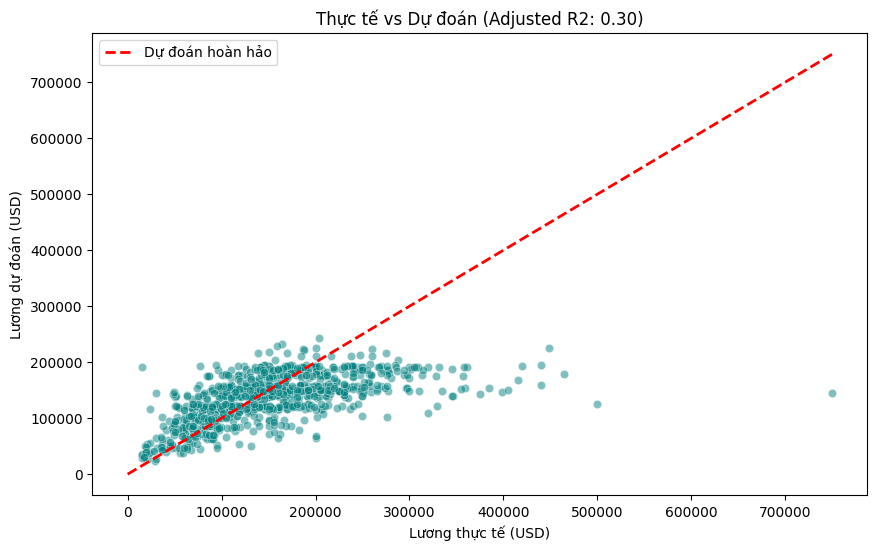

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. Tải dữ liệu
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Tiền xử lý dữ liệu (Preprocessing)
def preprocess_data(df):
    df_proc = df.copy()
    
    # Ordinal Encoding: Áp dụng cho các biến có thứ tự rõ ràng (logic)
    exp_map = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
    size_map = {'S': 1, 'M': 2, 'L': 3}
    df_proc['experience_level'] = df_proc['experience_level'].map(exp_map)
    df_proc['company_size'] = df_proc['company_size'].map(size_map)
    
    # Label Encoding: Cho các biến phân loại không có thứ tự
    cat_cols = ['job_title', 'employee_residence', 'company_location', 'employment_type']
    for col in cat_cols:
        le = LabelEncoder()
        df_proc[col] = le.fit_transform(df_proc[col])
        
    # Loại bỏ cột gây rò rỉ thông tin (leakage)
    df_proc = df_proc.drop(columns=['salary', 'salary_currency'])
    return df_proc

df_ml = preprocess_data(df)

# 3. Log Transformation: Giúp chuẩn hóa phân phối mục tiêu (Lương)
# Phép toán log1p (log(1+x)) giúp mô hình học tốt hơn với dữ liệu bị lệch (skewed)
y_log = np.log1p(df_ml['salary_in_usd'])
X = df_ml.drop(columns=['salary_in_usd'])

# 4. Chia dữ liệu Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 5. Huấn luyện với Gradient Boosting
model = GradientBoostingRegressor(
    n_estimators=300, 
    learning_rate=0.05, 
    max_depth=3, 
    subsample=0.8, 
    random_state=42
)
model.fit(X_train, y_train)

# 6. Dự đoán và chuyển đổi ngược từ Log sang USD (Inverse Transform)
y_pred_log = model.predict(X_test)
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred_log)

# 7. Tính toán các Metrics chi tiết
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2 = r2_score(y_test_actual, y_pred_actual)
medae = median_absolute_error(y_test_actual, y_pred_actual)

# Tính Adjusted R-squared
n = len(y_test_actual) # Số lượng mẫu
p = X_test.shape[1]    # Số lượng đặc trưng (features)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Xuất kết quả
print("--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ---")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R2 Score: {r2:.4f}")
print(f"Adjusted R2 Score: {adj_r2:.4f}")
print(f"Median Absolute Error: ${medae:,.2f}")

# 8. Vẽ biểu đồ so sánh Thực tế và Dự đoán
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_actual, y=y_pred_actual, alpha=0.5, color='teal')
# Vẽ đường tham chiếu (Lý tưởng: Thực tế = Dự đoán)
max_val = max(y_test_actual.max(), y_pred_actual.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', lw=2, label='Dự đoán hoàn hảo')
plt.xlabel('Lương thực tế (USD)')
plt.ylabel('Lương dự đoán (USD)')
plt.title(f'Thực tế vs Dự đoán (Adjusted R2: {adj_r2:.2f})')
plt.legend()
plt.show()

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
# THAY ĐỔI 1: Thêm mean_squared_error vào import
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error, mean_squared_error

# 1. Load Data & Lọc Nhiễu Nhẹ (Outlier Removal)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. Xây dựng bộ xử lý đặc trưng
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. Xây dựng Pipeline & Log Transform Tự động
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. Huấn luyện & Đánh giá
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

# THAY ĐỔI 2: Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("--- FINAL OPTIMIZED RESULT ---")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.2f}")
print(f"RMSE: ${rmse:,.2f}")  # In kết quả RMSE
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Median Absolute Error: ${median_absolute_error(y_test, y_pred):,.2f}")

--- FINAL OPTIMIZED RESULT ---
MAE: $38,389.67
RMSE: $51,390.41
R2 Score: 0.3074
Median Absolute Error: $30,442.35


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Import CatBoost
from catboost import CatBoostRegressor

# 1. Load Data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Feature Selection
features = ['work_year', 'experience_level', 'job_title', 'employee_residence', 'remote_ratio', 'company_size']
target = 'salary_in_usd'

X = df[features]
y = df[target]

# 3. Handling Outliers (IQR Method)
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (y >= lower_bound) & (y <= upper_bound)
X_clean = X[mask]
y_clean = y[mask]

print(f"Removed {len(df) - len(X_clean)} outliers. New dataset size: {len(X_clean)}")

# 4. Define Categorical Features
# CatBoost cần biết cột nào là categorical để xử lý nội bộ (tốt hơn One-Hot)
categorical_features = ['experience_level', 'job_title', 'employee_residence', 'company_size']

# 5. Training and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Khởi tạo mô hình CatBoost
# - iterations: số lượng cây
# - learning_rate: tốc độ học
# - depth: độ sâu của cây
# - cat_features: danh sách các cột phân loại
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    cat_features=categorical_features,
    verbose=0,  # Tắt log huấn luyện cho gọn
    random_state=42
)

# Fit mô hình
model.fit(X_train, y_train)

# Evaluation Metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance (CatBoost):")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R2): {r2:.4f}")

# 6. Make 3 Predictions
print("\n--- Model Predictions ---")
test_indices = [5, 15, 25]
for idx in test_indices:
    sample_x = X_test.iloc[[idx]]
    actual_y = y_test.iloc[idx]
    pred_y = model.predict(sample_x)[0]
    
    # Convert sample input to dict for readable printing
    print(f"\nInput: {sample_x.to_dict('records')[0]}")
    print(f"Actual Salary: ${actual_y:,.2f} | Predicted: ${pred_y:,.2f}")
    print(f"Difference: ${abs(actual_y - pred_y):,.2f}")

ModuleNotFoundError: No module named 'catboost'

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,806.97
RMSE (Sai số bình phương trung bình): $50,722.76
Median Error (Sai số trung vị - Phổ biến nhất): $29,908.51
R2 Score: 0.3253


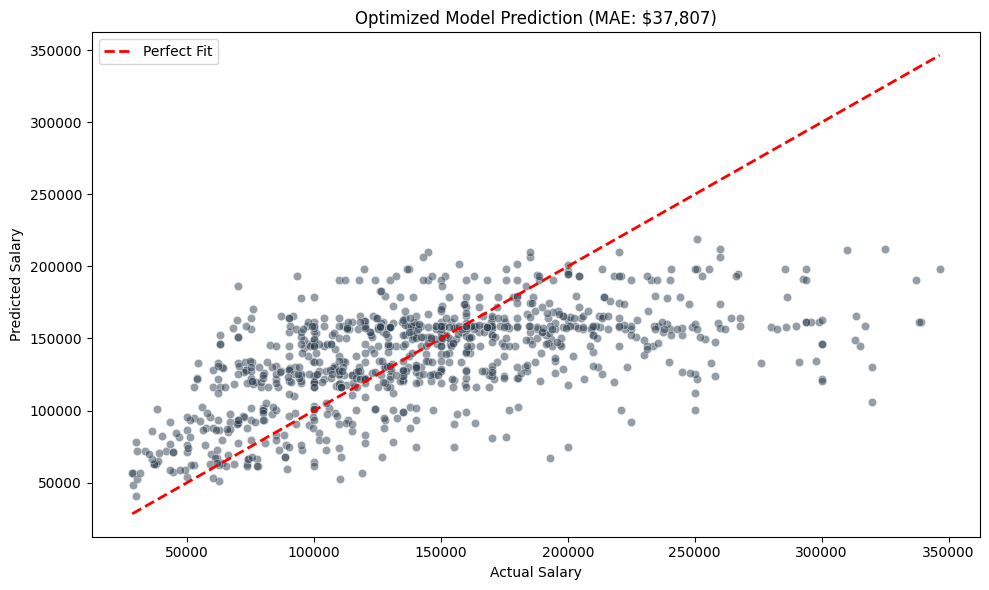

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type', 'work_year']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,804.18
RMSE (Sai số bình phương trung bình): $50,727.29
Median Error (Sai số trung vị - Phổ biến nhất): $29,830.52
R2 Score: 0.3252


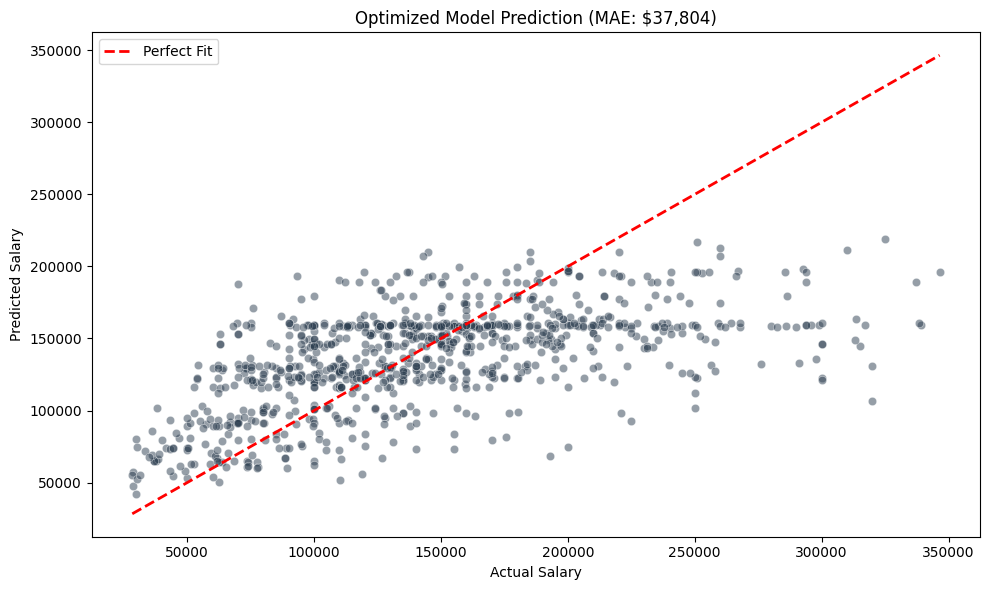

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

--- Đang tối ưu hóa tham số (K-Fold cv=5) ---

--- Đang đánh giá 10-Fold CV đa chỉ số trên toàn bộ dữ liệu ---
MAE trung bình:  $39,909.42 (+/- $2,264.75)
RMSE trung bình: $52,770.09 (+/- $3,372.03)
R2 trung bình:   0.3104 (+/- 0.0398)

--- KẾT QUẢ CUỐI CÙNG TRÊN TẬP TEST ---
MAE: $37,857.46 | RMSE: $50,824.80 | R2: 0.3226


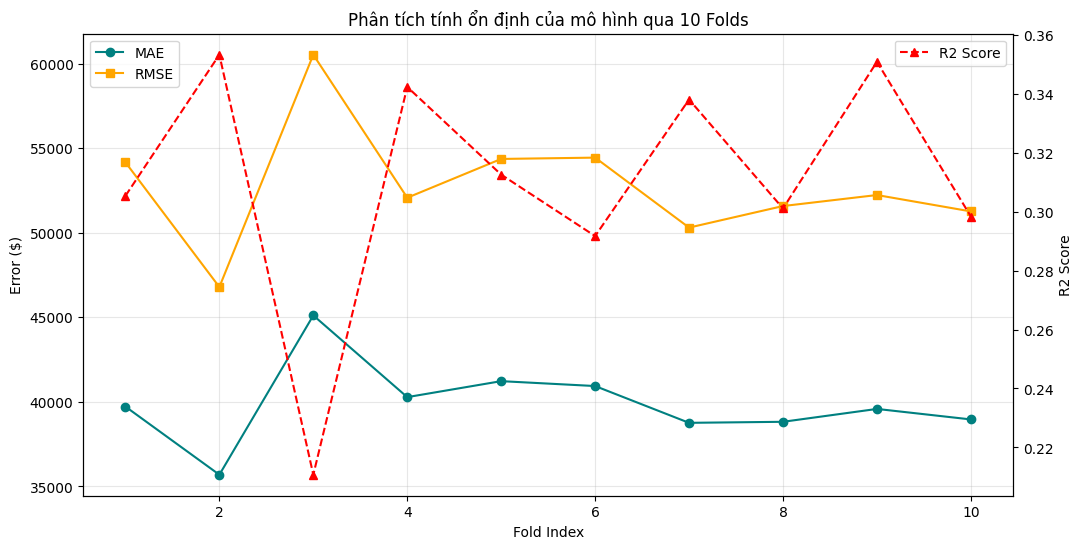

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_validate
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & CLEANING
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. FEATURE ENGINEERING
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]
nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type', 'work_year']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__regressor__max_depth': [3, 4, 5],
    'regressor__regressor__subsample': [0.7, 0.8, 0.9]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa tham số (K-Fold cv=5) ---")
search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, 
    n_iter=15, cv=5, scoring='neg_mean_absolute_error', 
    n_jobs=-1, random_state=42
)
search.fit(X_train, y_train)
best_model = search.best_estimator_

# --- PHẦN NÂNG CẤP: K-FOLD VỚI ĐA CHỈ SỐ (MULTI-METRIC CV) ---
print("\n--- Đang đánh giá 10-Fold CV đa chỉ số trên toàn bộ dữ liệu ---")
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv_results = cross_validate(best_model, X, y, cv=kf, scoring=scoring_metrics, n_jobs=-1)

# Chuyển đổi các giá trị âm của sklearn về số dương
cv_mae = -cv_results['test_mae']
cv_rmse = -cv_results['test_rmse']
cv_r2 = cv_results['test_r2']

print(f"MAE trung bình:  ${cv_mae.mean():,.2f} (+/- ${cv_mae.std():,.2f})")
print(f"RMSE trung bình: ${cv_rmse.mean():,.2f} (+/- ${cv_rmse.std():,.2f})")
print(f"R2 trung bình:   {cv_r2.mean():.4f} (+/- {cv_r2.std():.4f})")

# 5. ĐÁNH GIÁ TRÊN TẬP TEST ĐỘC LẬP
y_pred = best_model.predict(X_test)
final_mae = mean_absolute_error(y_test, y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_r2 = r2_score(y_test, y_pred)

print(f"\n--- KẾT QUẢ CUỐI CÙNG TRÊN TẬP TEST ---")
print(f"MAE: ${final_mae:,.2f} | RMSE: ${final_rmse:,.2f} | R2: {final_r2:.4f}")

# 6. VISUALIZATION - SO SÁNH BIẾN ĐỘNG CÁC CHỈ SỐ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ MAE và RMSE (trục tung bên trái)
ax1.plot(range(1, 11), cv_mae, marker='o', label='MAE', color='teal')
ax1.plot(range(1, 11), cv_rmse, marker='s', label='RMSE', color='orange')
ax1.set_xlabel('Fold Index')
ax1.set_ylabel('Error ($)')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Vẽ R2 (trục tung bên phải để dễ quan sát vì scale khác nhau)
ax2 = ax1.twinx()
ax2.plot(range(1, 11), cv_r2, marker='^', label='R2 Score', color='red', linestyle='--')
ax2.set_ylabel('R2 Score')
ax2.legend(loc='upper right')

plt.title('Phân tích tính ổn định của mô hình qua 10 Folds')
plt.show()

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,806.97
RMSE (Sai số bình phương trung bình): $50,722.76
Median Error (Sai số trung vị - Phổ biến nhất): $29,908.51
R2 Score: 0.3253


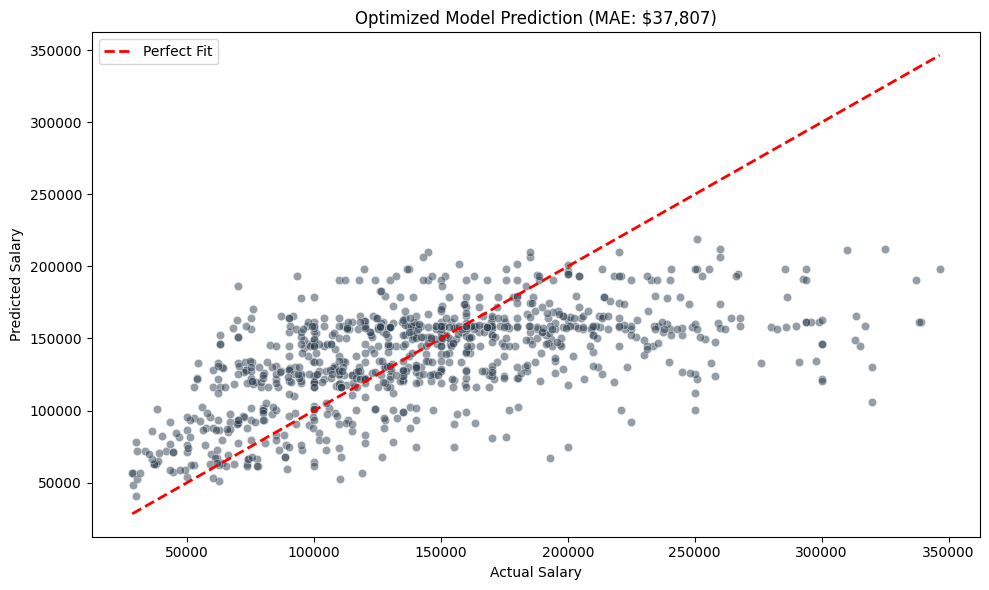

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type', 'work_year']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,794.60
RMSE (Sai số bình phương trung bình): $50,716.84
Median Error (Sai số trung vị - Phổ biến nhất): $29,961.05
R2 Score: 0.3254


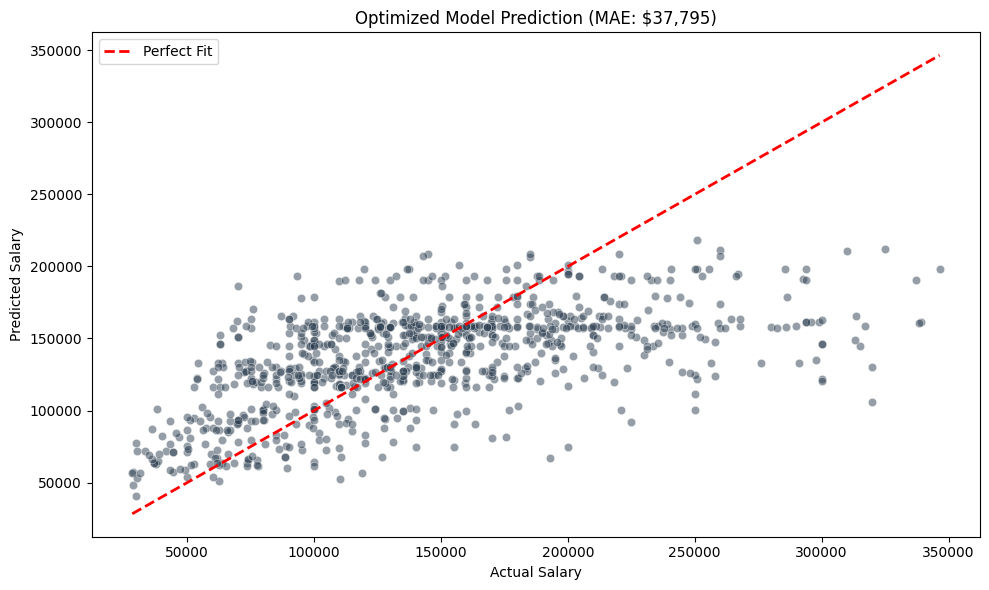

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type', 'work_year', 'remote_ratio']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()